In [145]:
import numpy as np
import matplotlib.pyplot as plt
from models.vibrating_string import Vibrating_string
from models.diffusion_equation import SimulationGrid
from models.methods import gauss_seidel, sor, jacobi

# Set 1

## 1.1 Vibrating string

### A: Discretization

A. (0.5 point) Discretize the wave equation, and write it in a form suitable for
implementing in a computer program. Assume that the boundaries are fixed, Ψ(x =
0, t) = 0, Ψ(x = L, t) = 0. L is the length of the string. Take L = 1 for simplicity.
Divide the string in N intervals, so that the interval length is ∆x = L/N . Also
consider the boundary cases.

### B: Plots

B. (1 point) Implement the time stepping. Determine the time development of
the string, with the following initial conditions. The string is at rest at t = 0, i.e.
Ψ′(x, t = 0) = 0.
i. Ψ(x, t = 0) = sin(2πx).
ii. Ψ(x, t = 0) = sin(5πx).
iii. Ψ(x, t = 0) = sin(5πx) if 1/5 < x < 2/5, else Ψ = 0.
Take c = 1 and use the time step ∆t = 0.001. Plot the result at several times in
the same ﬁgure, e.g. varying the color of the curve

#### $sin(2 \cdot \pi \cdot x)$

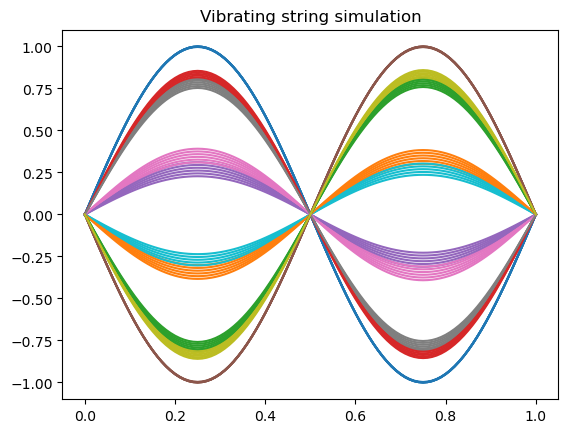

In [3]:
string = Vibrating_string(mode = 1,N = 100,T = 100)
string.plotter(1700)

#### $sin(5 \cdot \pi \cdot x)$

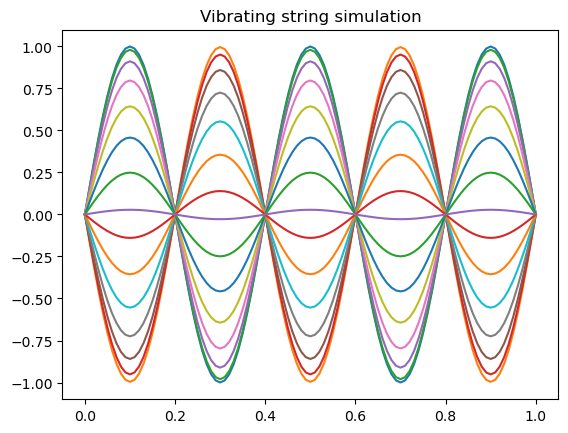

In [4]:
string = Vibrating_string(mode = 2,N = 100,T = 100)
string.plotter(7000)

#### $sin(5 \cdot \pi \cdot x)$ if $1/5 <x<2/5$

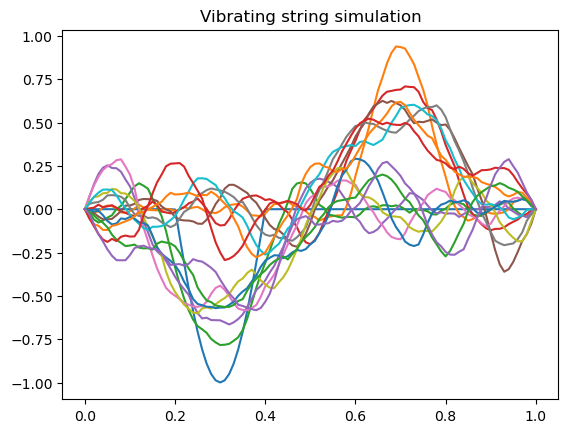

In [5]:
string = Vibrating_string(mode = 3,N = 100,T = 100)
string.plotter(7000)

### C: Animated plots

C. (1 point) Make an animated plot of the time development. This can be done
from within matplotlib, 

#### $sin(2 \cdot \pi \cdot x)$

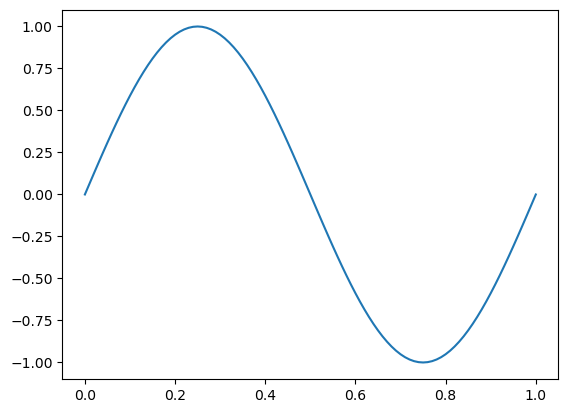

C:\Users\Aleks\AppData\Local\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [6]:
string = Vibrating_string(mode = 1,N = 100,T = 100)
string.animation()

#### $sin(5 \cdot \pi \cdot x)$

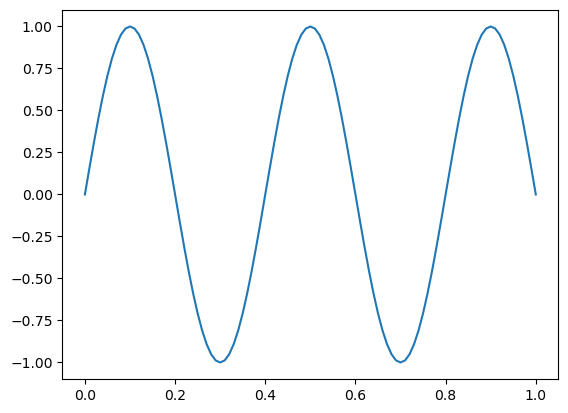

In [7]:
string = Vibrating_string(mode = 2,N = 100,T = 100)
string.animation()

#### $sin(2 \cdot \pi \cdot x)$ if $1/5 < x < 2/5$

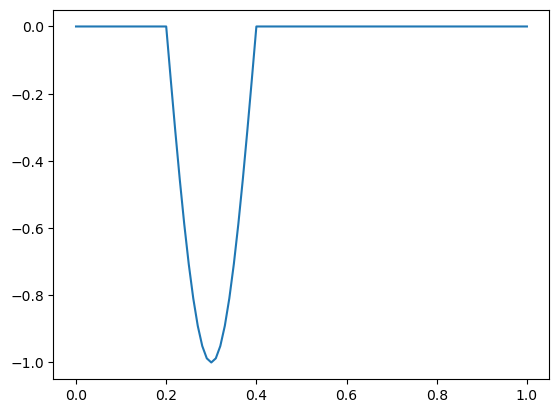

In [8]:
string = Vibrating_string(mode = 3,N = 100,T = 100)
string.animation()

## 1.2. The Time Dependent Diffusion Equation

### D

D. (0.5 point) Determine the equation to use at the boundaries of the domain.
Clearly show the ranges of the indices of the grid. A ﬁgure is extremely helpful for
ﬁguring this out

------

### E


E. (1 point) Test the correctness of your simulation. Compare to the analytic
solutions, plot c(y) for diﬀerent times. The analytic solution i

In [9]:
dif = SimulationGrid(50)

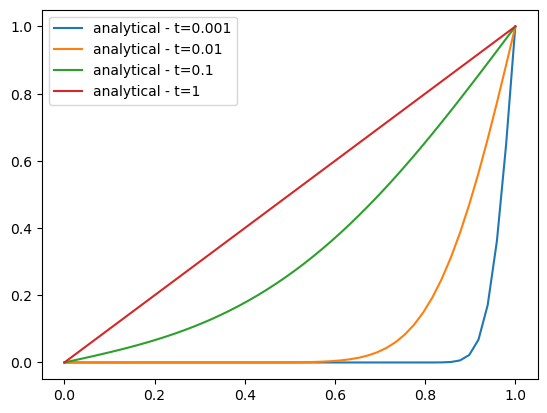

In [10]:
y_input = np.linspace(0,1,50)
time_show = [0.001, 0.01, 0.1, 1] 

for t in time_show:
    result = dif.c_analytical(t)
    text = f"analytical - t={t}"
    plt.plot(y_input,result,label=text)
    plt.legend()
plt.show()

In [11]:
# y_input = np.linspace(0,1,50)
# time_show = [0.001, 0.01, 0.1, 1] 
# dif.time_dependent(t = 1,time_list = time_show)
# for d in dif.data:
#     text = f" Time dependent"
#     plt.plot(d[::-1,1],label=text)
#     plt.legend()
# plt.show()

### F

F. (1 point) Plot the results, show the 2D domain, with a color representing the
concentration at each point. Make a plot of the state of the system at several times:
t = {0, 0.001, 0.01, 0.1, and 1}.

In [12]:
# test = SimulationGrid(50)
# data, times = test.diffusion_iteration(1,10)
# print(len(data))
# print(times)
# print(len(data[0][:,0][::-1]))
# plt.imshow(data[-1])

### G

1 point) Make an animated plot of the time dependent diﬀusion equation until
equilibrium

### H

(1 point) Implement the Jacobi iteration, the Gauss-Seidel method and SOR.
Try N = 50. Test the methods by comparing the result to the analytical result in
eq. (5), i.e. the linear dependence of the concentration on y

In [13]:
N = 50
dif = SimulationGrid(50)

#### Analytical

### I

#### Jacobi

In [38]:
stop_criteria = np.linspace(0.01, 0.00001, num=20, endpoint=True)
print(stop_criteria)

iterations_jacobi= []
iterations_gauss= []
iterations_sor= []
for delta in stop_criteria:
        dif.time_independent(jacobi,stop = delta)
        iterations_jacobi.append(dif.iterations[-1])so
        
        dif.time_independent(gauss_seidel,stop = delta)
        iterations_gauss.append(dif.iterations[-1])
        
        dif.time_independent(sor,w =1/3,stop = delta)
        iterations_sor.append(dif.iterations[-1])
        

[1.00000000e-02 9.47421053e-03 8.94842105e-03 8.42263158e-03
 7.89684211e-03 7.37105263e-03 6.84526316e-03 6.31947368e-03
 5.79368421e-03 5.26789474e-03 4.74210526e-03 4.21631579e-03
 3.69052632e-03 3.16473684e-03 2.63894737e-03 2.11315789e-03
 1.58736842e-03 1.06157895e-03 5.35789474e-04 1.00000000e-05]


Text(0.5, 0, 'Iterations k')

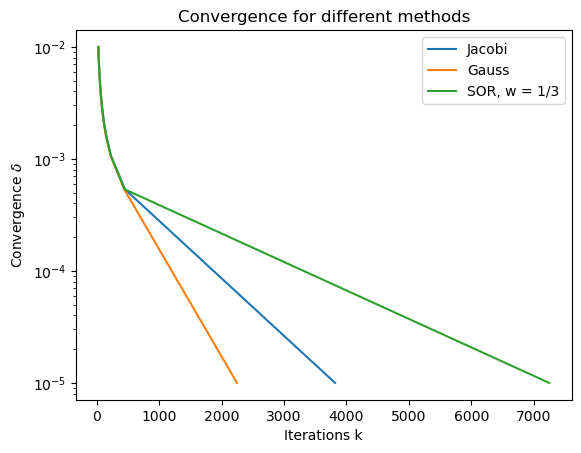

In [45]:
plt.plot(iterations_jacobi, stop_criteria, label = 'Jacobi')
plt.plot(iterations_gauss, stop_criteria, label = 'Gauss')
plt.plot(iterations_sor, stop_criteria, label = 'SOR, w = 1/3')
plt.legend()


plt.title('Convergence for different methods')
plt.yscale('log')
# plt.xscale('log')
plt.ylabel(r'Convergence $\delta$')
plt.xlabel('Iterations k')


#### Investigating different values of SOR

In [115]:
stop_criteria = np.linspace(0.01, 0.00001, num=20, endpoint=True)
ws  = [0.1, 0.5, 1, 1.5, 1.9]
results_gauss = []
for w_n in ws :
    print(w_n)
    iterations_sor = []
    for delta in stop_criteria:
        dif.time_independent(sor,w =w_n,stop = delta, store_step = 10000)
        iterations_sor.append(dif.iterations[-1])    
    results_gauss.append(iterations_sor)


0.1
0.5
1
1.5
1.9


Text(0.5, 0, 'Iterations k')

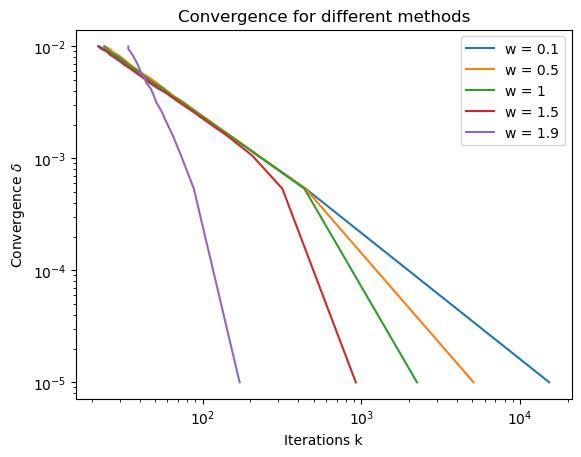

In [123]:

for k in range(len(ws)): 
    plt.plot(results_gauss[k], stop_criteria, label = f"w = {ws[k]}")


plt.legend()
# plt.plot(iterations_sor, stop_criteria, label = f"w = {w_n}")
plt.title('Convergence for different methods')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'Convergence $\delta$')
plt.xlabel('Iterations k')

#### SOR

### J

We need to find best W for different N 
Results
x-axis = List of Ns
Y-AXIS 
Steps:
for fi

In [250]:
def w_optimizer(Ns,ws, delta = 0.01):
    '''
    Creates a Simulation Grid of given size and calculates best w within range
    '''
    results = []
    for N in Ns:
        grid = SimulationGrid(N)
        max_iterations = float('inf')
        best_w = None
        for wx in ws:
            print(wx)
            grid.time_independent(sor,w =wx,stop = delta, store_step = 10000)
            iterations  = grid.iterations[-1]
            if iterations < max_iterations:
                max_iterations = iterations
#                 print(max_iterations)
                best_w = wx
#         print((N,best_w))
        results.append((N,best_w))
    return results    

In [125]:
dw = 0.005
ws = np.arange(1.71,1.99,dw)

dN= 10
Ns = np.arange(10,70+dN, dN)
print(Ns)

w_results = w_optimizer(Ns,ws, delta = 0.001)

[10 20 30 40 50 60 70]
(10, 1.71)
(20, 1.7899999999999983)
(30, 1.8549999999999969)
(40, 1.8899999999999961)
(50, 1.9099999999999957)
(60, 1.9249999999999954)
(70, 1.9349999999999952)


Text(0, 0.5, '$\\omega_{{optimal}}$')

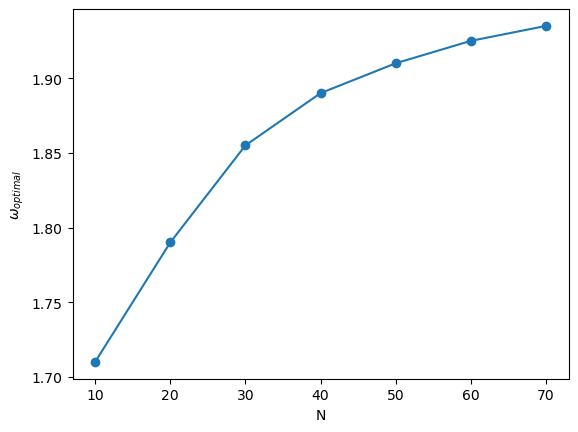

In [144]:
w_results = np.array(w_results)
plt.plot(w_results[:,0], w_results[:,1])
plt.scatter(w_results[:,0], w_results[:,1])
plt.xlabel('N')
plt.ylabel(r'$\omega_{{optimal}}$')

### K

Experimenting with cubes

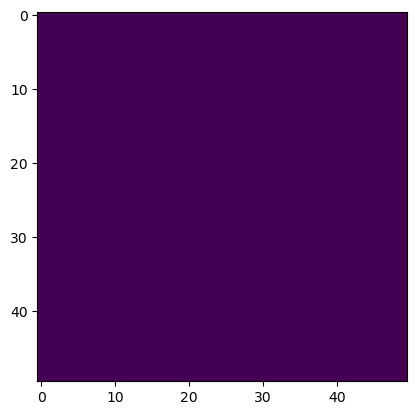

In [166]:
# sq1 = square(self, size, position)
N_reference = 50
test = np.zeros((N_reference,N_reference))
plt.imshow(test)

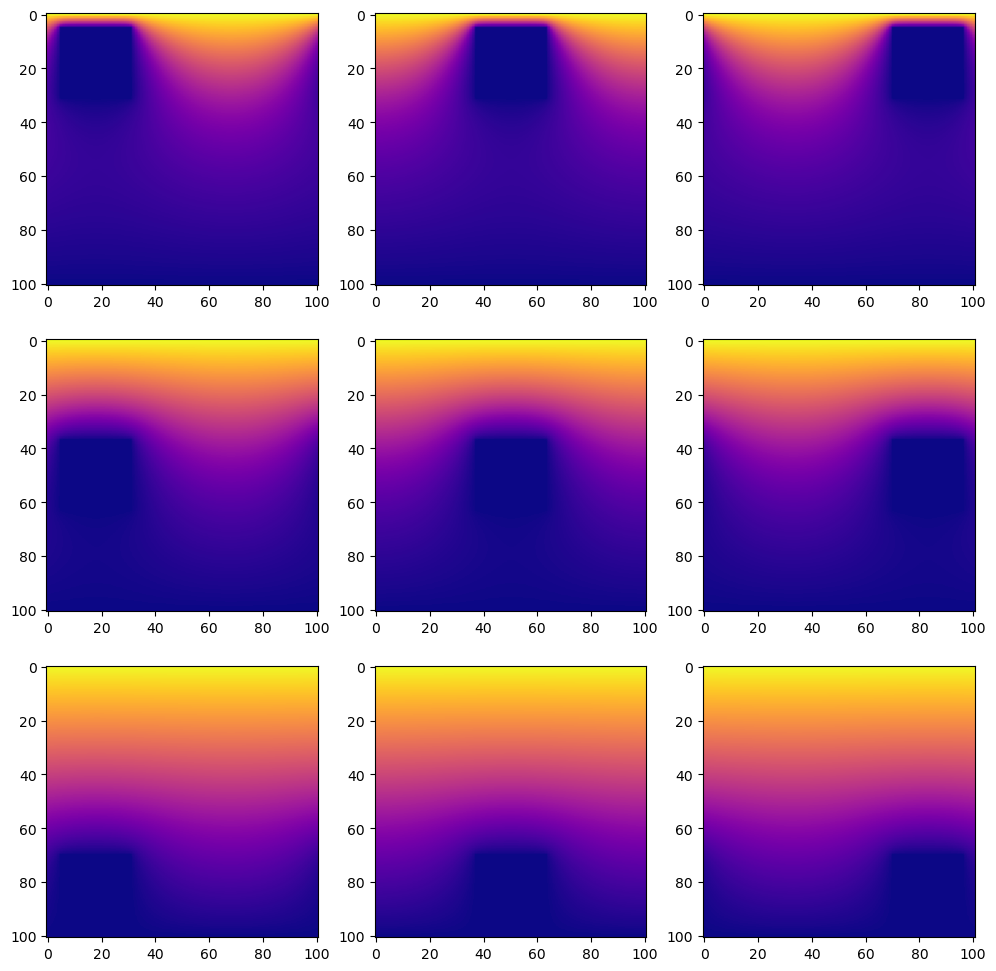

In [233]:
# Create a figure and three subplots arranged horizontally
fig, axs = plt.subplots(3, 3, figsize=(12, 12))


#26% size seems ideal, if not use 24%
gridboi = SimulationGrid(100)
indxs = [5, 5]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[0,0].imshow(gridboi.data[-1],cmap='plasma')


gridboi = SimulationGrid(100)
indxs = [5, 37]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[0,1].imshow(gridboi.data[-1],cmap='plasma')

gridboi = SimulationGrid(100)
indxs = [5, 100-5-25]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[0,2].imshow(gridboi.data[-1],cmap='plasma')

#SECOND ROW ================================================================
gridboi = SimulationGrid(100)
indxs = [37, 5]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[1,0].imshow(gridboi.data[-1],cmap='plasma')


gridboi = SimulationGrid(100)
indxs = [37, 37]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[1,1].imshow(gridboi.data[-1],cmap='plasma')

gridboi = SimulationGrid(100)
indxs = [37, 100-5-25]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[1,2].imshow(gridboi.data[-1],cmap='plasma')

#THIRD ROW ================================================================
gridboi = SimulationGrid(100)
indxs = [100-5-25, 5]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[2,0].imshow(gridboi.data[-1],cmap='plasma')


gridboi = SimulationGrid(100)
indxs = [100-5-25, 37]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[2,1].imshow(gridboi.data[-1],cmap='plasma')

gridboi = SimulationGrid(100)
indxs = [100-5-25, 100-5-25]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[2,2].imshow(gridboi.data[-1],cmap='plasma')

# Show the plot
plt.show()



#### Number of iterations

In [241]:
# We keep track of iterations and position along axis 

N = 100
size = 20
y_range = [0,80]

indx_range =np.arange(y_range[0],y_range[1],5)

cube_centers = indx_range + (size/2)
# print(cube_centers)
print(indx_range)
print(cube_centers)

x_results = []
y_results = []

for k in range(len(indx_range)):
    indx = indx_range[k]
#     print(indx)
    #Results for x_axis
    gridboi = SimulationGrid(100)
    gridboi.square(size, [5, indx])
    gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
    iterations = gridboi.iterations[-1]
    x_results.append(iterations)
    
    #Results for x_axis
    gridboi = SimulationGrid(100)
    gridboi.square(size, [indx, 5])
    gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
    iterations = gridboi.iterations[-1]
    y_results.append(iterations)

x_results = np.array(x_results)
y_results = np.array(y_results)

    

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75]
[10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.]


In [239]:
gridboi = SimulationGrid(100)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)

reference_iterations =gridboi.iterations[-1]
print(reference_iterations)

404


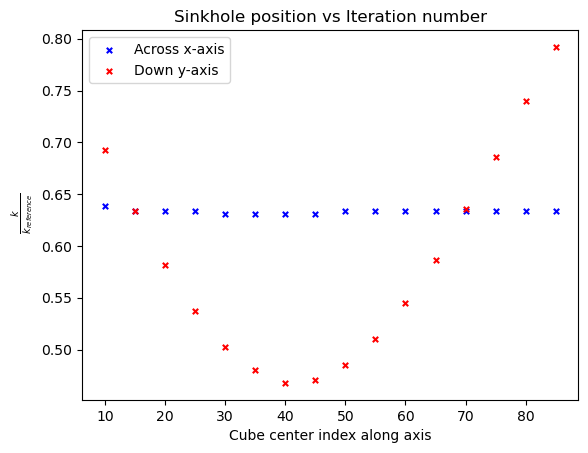

In [311]:
plt.scatter(cube_centers, x_results/reference_iterations, marker= 'x',label= 'Across x-axis', color='blue', s =15)
plt.scatter(cube_centers, y_results/reference_iterations, marker= 'x',label= 'Down y-axis', color= 'red', s=15)
plt.xlabel('Cube center index along axis')
plt.ylabel(r' $\frac{k}{k_{reference}}$')
# plt.ylabel(r'fraction of $k_{original}$')
plt.title('Sinkhole position vs Iteration number')
plt.legend()

#### Optimal w

In [292]:
def w_cube_optimizer(indxs,ws, size = 26,delta = 0.001, N=100):
    '''
    Creates a Simulation Grid of given size and calculates best w within range
    '''
    grid = SimulationGrid(N)
    grid.square(size, indxs)
    best_w = None
    max_iterations = float('inf')
    for wx in ws:
        grid.time_independent(sor,w =wx,stop = delta, store_step = 10000)
        iterations  = grid.iterations[-1]
        if iterations < max_iterations:
            max_iterations = iterations
            best_w = wx
    return best_w    

#### Checking position of cube against w

In [293]:
# print(np.arange(1.71,1.99,0.01))
test= SimulationGrid(50)
test.square(size=8,position =[40,22])
y_range = np.arange(0,40+5,5)

w_opt_cube = []
for yx in y_range:
    w_results = w_cube_optimizer(indxs= [yx,22], ws = np.arange(1.85,1.99,0.01), size = 8,delta = 0.001, N=50)
    w_opt_cube.append(w_results)
    
print(w_results)

1.9000000000000001


[1.8900000000000001, 1.87, 1.87, 1.87, 1.86, 1.86, 1.87, 1.8900000000000001, 1.9000000000000001]


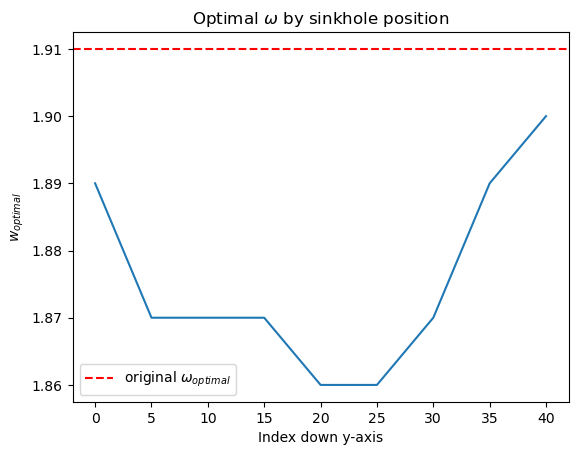

In [322]:
# w_opt_cube = np.arange(w_opt_cube)
reference_w = 1.91
print(w_opt_cube)
plt.plot(y_range, w_opt_cube)
plt.axhline(y=reference_w, color='r', linestyle='--',label=r'original $\omega_{optimal}$')
plt.xlabel('Index down y-axis')
plt.ylabel(r'$w_{optimal}$')
plt.title(r'Optimal $\omega$ by sinkhole position')
plt.legend(loc='lower left')



#### Checking for size of cube

In [ ]:
 print(np.arange(1.71,1.99,0.01))
test= SimulationGrid(50)
test.square(size=8,position =[40,22])
y_range = np.arange(0,40+5,5)
cube_sizes = np.arange(3,30)
w_opt_cube = []

for sizee in cube_sizes:
    w_results = w_cube_optimizer(indxs= [22, 22], ws = np.arange(1.85,1.99,0.01), size = sizee, delta = 0.001, N=50)
    w_opt_cube.append(w_results)
    
print(w_results)

In [260]:
ws = np.arange(1.85,1.99,0.01)
indx_range =np.arange(0,44,5)
print(indx_range)
w_opt_cube = []

for indx in indx_range:
    w_results = w_cube_optimizer([indx,37],ws, size = 5, delta = 0.001)
    w_opt_cube.append(w_results[1])
    
    
# w_results = w_optimizer([100],ws, delta = 0.001)


    
print(w_opt_cube)

KeyboardInterrupt: 

In [254]:
plt.plot(indx_range/100, w_opt_cube)

NameError: name 'w_opt_cube' is not defined

#### Checking size of cube

In [ ]:
ws = np.arange(1.9,2,0.01)
indx_range =np.arange(y_range[0],y_range[1],5)
w_opt_cube = []

cube_sizes = np.arange(3)

for sizee in sizes:
    w_results = w_cube_optimizer([37,37],size = sizee,ws, delta = 0.001)
    w_opt_cube.append(w_results[1])
    

In [ ]:
def w_optimizer(Ns, initial_w=1.0, learning_rate=0.01, max_iter=, delta=0.01, tol=50):
    '''
    Creates a Simulation Grid of given size and calculates best w within range
    '''
    results = []
    for N in Ns:
        print(N)
        prev_w = initial_w
        grid = SimulationGrid(N)
        for iter in range(max_iter):
            # Compute the gradient of the objective function with respect to w
 
            gradient = (sor(grid, prev_w + delta) - sor(N, prev_w - delta)) / (2 * delta)
            # Update w using gradient descent
            w = prev_w - learning_rate * gradient
            # Convergence criterion: stop if change in w is smaller than tolerance
            if abs(w - prev_w) < tol:
                break
            prev_w = w
        results.append((N, w))
    return results

def sor(grid, wx):
    # Placeholder for sor function implementation
    grid.time_independent(sor,w =wx, stop = 0.001, store_step = 10000)
    iterations = grid.iterations[-1]
    return iterations


In [ ]:
def w_optimizer(Ns, initial_w=1.85, learning_rate=0.01, max_iter=10, delta=0.01):
    '''
    Creates a Simulation Grid of given size and calculates best w within range
    '''
    results = []
    for N in Ns:
        print(N)
        best_w = initial_w  # Initialize w
        for _ in range(max_iter):
            # Compute the derivative of the objective function with respect to w
            gradient = (sor(N, best_w + delta) - sor(N, best_w - delta)) / (2 * delta)
            # Update w using gradient descent
            best_w -= learning_rate * gradient
        results.append((N, best_w))
    return results

# Assuming sor function is defined elsewhere
def sor(N, w):
    # Placeholder for sor function implementation
    return np.random.rand()

# Example usage
Ns = [10, 20, 30]
results = w_optimizer(Ns)
print(results)

In [251]:
x1,x2 = [1,2]
x1

1